In [36]:
# import required libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data
data = pd.read_csv('ds_salaries.csv')

# Summary

As Data Science is one of the trending topic in 2023 and i am also looking for my carrer in this field so i am doing detailed analysis on it from  2020 to 2023. This analysis will serve as a valuable resource for individuals looking for career guidance, companies and their compensation strategies, their salaries and alot.

The dataset contains information about data science salaries from 2020 to 2023. It includes information about job title, employment type, experience level, expertise level, salary, salary currency, company location, salary in USD, employee residence, company size, and year.

Overall, the dataset shows that data science is a high-paying field with good job prospects. The average salary for data scientists has increased significantly over the past four years, and the demand for data scientists is expected to continue to grow in the future.

# Data Preparation and cleaning

In [3]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [38]:
# columns 
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [4]:
# shape of data
data.shape

(3755, 11)

In [39]:
# datatypes of all the columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [40]:
# Converting 'employee_residence','company_location','company_size','experience_level','employment_type' to categorical variables.

data['employee_residence'] = data['employee_residence'].astype('category')
data['company_location'] = data['company_location'].astype('category')
data['company_size'] = data['company_size'].astype('category')
data['experience_level'] = data['experience_level'].astype('category')
data['employment_type'] = data['employment_type'].astype('category')


In [42]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


### Check missing values

In [43]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Check duplicate values

In [44]:
pd.set_option("display.max_columns", None)

In [45]:
data[data.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,senior,full_time,Data Scientist,150000,USD,150000,US,0,US,medium
123,2023,senior,full_time,Analytics Engineer,289800,USD,289800,US,0,US,medium
153,2023,mid,full_time,Data Engineer,100000,USD,100000,US,100,US,medium
154,2023,mid,full_time,Data Engineer,70000,USD,70000,US,100,US,medium
160,2023,senior,full_time,Data Engineer,115000,USD,115000,US,0,US,medium
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,mid,full_time,Data Scientist,78000,USD,78000,US,100,US,medium
3440,2022,senior,full_time,Data Engineer,135000,USD,135000,US,100,US,medium
3441,2022,senior,full_time,Data Engineer,115000,USD,115000,US,100,US,medium
3586,2021,mid,full_time,Data Engineer,200000,USD,200000,US,100,US,large


### Check unique values

In [46]:
data.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

### Rename some features for better understanding

In [90]:
# experience level column 
data['experience_level'] = data['experience_level'].replace({'SE':'senior','MI':'mid','EN':'entry','EX':'executive'})

In [48]:
# employment type column
data['employment_type'] = data['employment_type'].replace({'FL':'freelance','CT':'contract','FT':'full_time','PT':'part_time'})

In [92]:
# company size column
data['company_size'] = data['company_size'].replace({'L':'large','M':'medium','S':'small'})

### Name of different type of jobs 

In [93]:
data['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Scientist', 'Lead 

In [94]:
# count of different jobs
data['job_title'].nunique()

93

In [95]:
jobs_df = pd.DataFrame(data['job_title'].value_counts().reset_index())
jobs_df.rename(columns = {'job_title':"profession",'count':'frequency'},inplace = True)

In [96]:
jobs_df

,profession,frequency
0,Data Engineer,1040
1,Data Scientist,840
2,Data Analyst,612
3,Machine Learning Engineer,289
4,Analytics Engineer,103
...,...,...
88,Data Management Specialist,1
89,Principal Machine Learning Engineer,1
90,Azure Data Engineer,1
91,Manager Data Management,1


In [97]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3754.000000,3.754000e+03,3754.000000,3754.000000
mean,2022.373468,1.903468e+05,137494.134257,46.283964
std,0.691465,6.714258e+05,62890.622978,48.589652
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.377500e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [98]:
pd.set_option('display.max_columns', None)
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,senior,full_time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,large
1,2023,mid,contract,ML Engineer,30000,USD,30000,US,100,US,small
2,2023,mid,contract,ML Engineer,25500,USD,25500,US,100,US,small
3,2023,senior,full_time,Data Scientist,175000,USD,175000,CA,100,CA,medium
4,2023,senior,full_time,Data Scientist,120000,USD,120000,CA,100,CA,medium
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,senior,full_time,Data Scientist,412000,USD,412000,US,100,US,large
3751,2021,mid,full_time,Principal Data Scientist,151000,USD,151000,US,100,US,large
3752,2020,entry,full_time,Data Scientist,105000,USD,105000,US,100,US,small
3753,2020,entry,contract,Business Data Analyst,100000,USD,100000,US,100,US,large


# Exploratory Analysis and Visualization

In this section, are doing doing exploratory data analysis and visualization of given dataset. Following questions will be solved :
1. Distribution of Experience level
2. Top 10 Data Science job positions
3. Comparing salaries of Data scientist jobs based on Experience level
4. Comparing salaries of Data scientist jobs based on Employment type
5. Salary distribution trend from 2020 to 2023
6. Comparing salaries based on experience level and Size of company
8. Average salary as a function of currency
9. WorldColud


### Distribution of Experience level

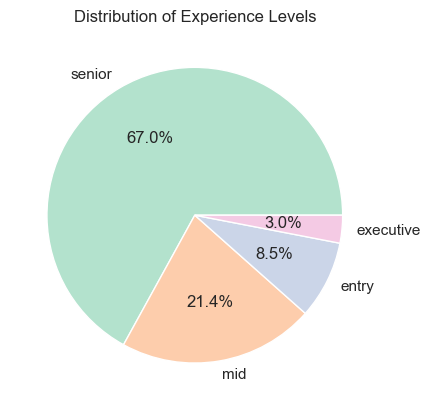

In [99]:
import matplotlib.pyplot as plt

df = data['experience_level'].value_counts()

fig, ax = plt.subplots()
ax.pie(df, labels=df.index, autopct='%1.1f%%', colors=plt.cm.Pastel2.colors)

ax.set_title('Distribution of Experience Levels')


plt.show()


#### In the dataset 8.5 % members are freshers while most quota is filled by Senior at 67 %.

### Top 10 Jobs in Data Science

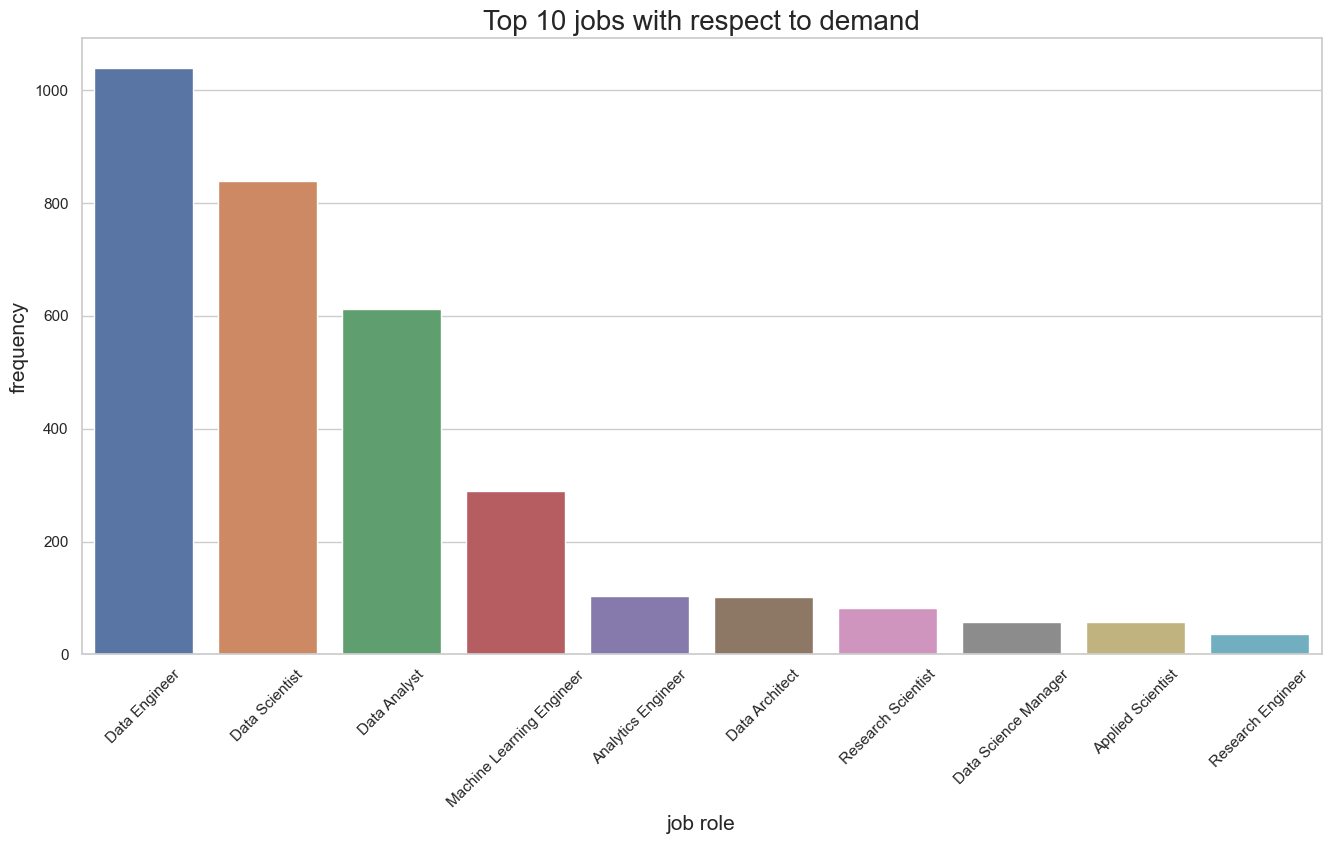

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.title("Top 10 jobs with respect to demand",fontsize=20)
sns.barplot(x=jobs_df["profession"][:10],y=jobs_df['frequency'][:10])
plt.ylabel("frequency",fontsize=15)
plt.xlabel("job role",fontsize=15)
plt.xticks(rotation=45)
plt.show()


#### It can be observed that Data Engineer is the most common job title followed by Data Scientist and Data Analysts respectively.

### Comparing salaries of Data scientist jobs based on Experience level

In [101]:
fig = px.box(data, x="experience_level", y="salary_in_usd",
            title = 'Salary vs Experience level', color = 'experience_level',
            color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(xaxis_title="Experience Level", yaxis_title="Salary in USD")
fig.show()

#### Naturally, we can notice that more the experience, better you get paid for it. However, at highest executive level, the salaries various much more as compared to other levels.

### Comparing salaries of Data scientist jobs based on Employment type.

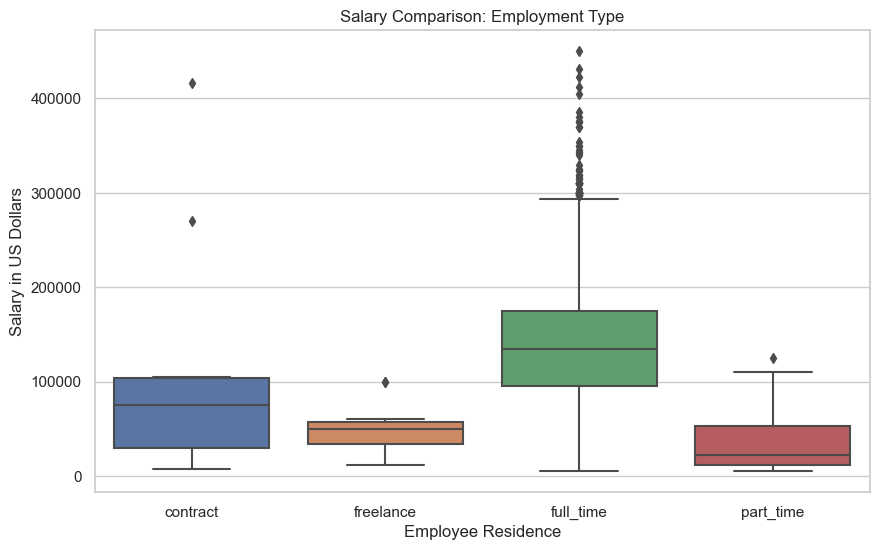

In [102]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='employment_type', y='salary_in_usd')
plt.xlabel('Employee Residence')
plt.ylabel('Salary in US Dollars')
plt.title('Salary Comparison: Employment Type')
plt.show()

#### We can notice that full time jobs are earning handsome salary. Although the variation in their payscale is also too high. Although contract based jobs are on second number in this race and they are getting good salary. An interesting observation is that freelancers earn slightly than part timers but variation in their payscales almost looks proportional. 

### Salary distribution trend from 2020 to 2023.

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

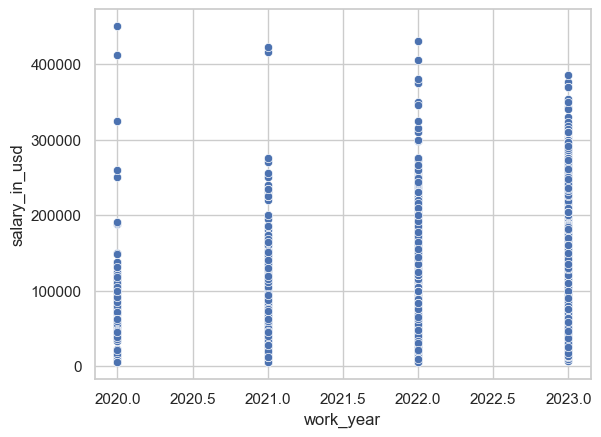

In [103]:
import seaborn
seaborn.set(style='whitegrid')

sns.scatterplot(x = 'work_year',y = 'salary_in_usd', data = data)

##### There is positive trend in salary from 2020 to 2023 , based on this we can conlude that salary is increasing continuously

### Comparing salaries based on experience level and Size of company

In [104]:
fig = px.box(data, x="experience_level", y="salary_in_usd", color="company_size",
            title = 'Salary vs Experience level based on Company Size', 
            color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(xaxis_title="Experience Level", yaxis_title="Salary in USD")
fig.show()

#### Adding a hue 'company size' for the  'experience level' vs 'salary' graph reveals more information. Senior levels jobs salaries on an average concides almost with Executive level salaries.

### Average salary as a function of currency

In [107]:
data[data.salary_currency == 'ILS']
data.drop(528,inplace = True)

In [108]:
df = data[['salary_currency','salary_in_usd']].groupby(['salary_currency'], as_index=False).mean().set_index('salary_currency').reset_index().sort_values('salary_in_usd',ascending = False)
df = df.iloc[:15]
fig = px.bar(df, x='salary_currency', y='salary_in_usd', color = 'salary_currency',
            color_discrete_sequence=px.colors.qualitative.Safe,
            title = 'Average salary as a function of currency')
fig.update_layout(xaxis_title="Currency", yaxis_title="Mean Salary")
fig.show()

#### Taking average salaries as a function of currency reveals that people earn most in USD, followed by Swiss franc and Singapore dollar. This graph is heavily influenced by the value of a particular currency as most currencies on the left hand side of graph have relatively high value against USD.

#### WorldColud

In [78]:
pip install WorldCloud

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement WorldCloud (from versions: none)
ERROR: No matching distribution found for WorldCloud


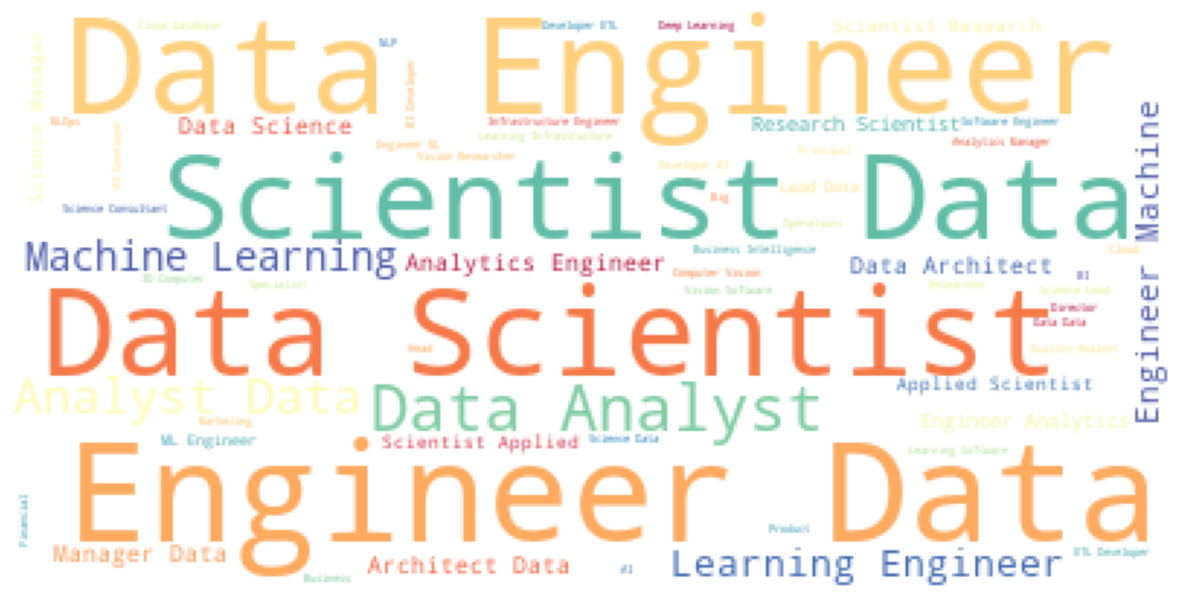

In [109]:
from wordcloud import WordCloud
text = " ".join(job_titles for job_titles in data["job_title"])
word_cloud = WordCloud(background_color = 'white', colormap = 'Spectral', min_font_size = 4).generate(text)
plt.figure(figsize = (15, 15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#### The word that appear most in the dataset are written in the bigger font while the ones that appear less are written in relatively smaller font. A collage of these words is created. 

## Inferences and Conclusion

After a detailed analysis we can  concluded that:

1. Data Science is one the most popular and emerging field in almost all industries such as Healthcare, Sports, Art, etc.
2. The variation of average salary of data scientists across the world are explored.
3. The variation of salaries across type of employment such as Contract basis, Full-time, etc is very crucial. 
4. The variation of salaries as you gain experience is a rising curve. 